# **InstaCart Market Basket Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plotting package
import seaborn as sns #plotting package
color = sns.color_palette()
import warnings
import gc

## **Dataset**

The dataset for this competition is a relational set of files describing customers' orders over time.  The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, they provide between 4 and 100 of their orders, with the sequence of products purchased in each order
There is also information about the week and hour of day the order was placed, and a relative measure of time between orders.

 They are total of 5 tables, Orders, Aisles, products, Departments, Order_products__

#https://www.kaggle.com/c/instacart-market-basket-analysis/data

**Loading dataset**

In [ ]:
orders = pd.read_csv("/content/orders.csv")

In [ ]:
aisles = pd.read_csv("/content/aisles.csv")

In [ ]:
department = pd.read_csv("/content/departments.csv")

In [ ]:
products = pd.read_csv("/content/products.csv")

In [ ]:
train = pd.read_csv("/content/order_products__train.csv")

In [ ]:
order_products_prior  = pd.read_csv("/content/order_products__prior.csv")

In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


The aisles table gives us the information of type of aisles present in the dataset 

In [ ]:
print('Shape of the dataset :',aisles.shape)
print('Number of unique aisles present: ', aisles.aisle_id.unique().shape[0])

Shape of the dataset : (134, 2)
Number of unique aisles present:  134


They are 134 aisles in the store

In [ ]:
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Department table gives us the information about the departments and department_id 

In [ ]:
#number of departments present in the store
print('Shape of the dataset :',department.shape)
print('Number of unique departments present: ', department.department_id.unique().shape[0])

Shape of the dataset : (21, 2)
Number of unique departments present:  21


They are a total of 21 departments in the store

In [ ]:
#products dataset
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Products table gives us the information of product name, aisle, department it belongs to

In [ ]:
#number of products offered by the store.
print('Shape of the dataset :',products.shape)
print('Number of products :', products.product_id.unique().shape[0])

Shape of the dataset : (49688, 4)
Number of products : 49688


They are 49688 products in the store we can get more information on aisles and department by combining the products, aisles, department tables. We are merging the tables here because, we get the detailed information of the product and with that, we can get count of products in each department

In [ ]:
#merging table aisles and department with products.
products_merged = pd.merge(products, aisles, on='aisle_id', how='inner')
products_merged = pd.merge(products_merged, department, on='department_id', how='inner')
products_merged.shape
#explore
products_merged.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks


Now, each product and its department and aisle are clearly available

In [ ]:
#sorting by product_id (Optional)
products_merged.sort_values(by='product_id', inplace=True)
products_merged.reset_index(drop=True, inplace=True)

In [ ]:
products_merged.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


All the products, departments,aisles are sorted which gives us a better understanding of the product

In [ ]:
#department with most products.
products_merged.department.value_counts()

personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1115
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
Name: department, dtype: int64

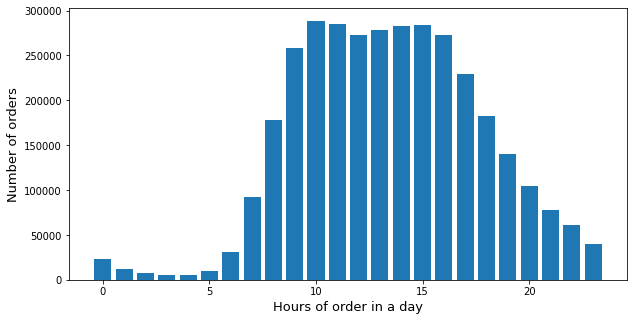

In [ ]:
grouped = orders.groupby("order_id")["order_hour_of_day"].aggregate("sum").reset_index()
grouped = grouped.order_hour_of_day.value_counts()
#sns.set_style('darkgrid')
fig = plt.figure(figsize = (10, 5))
plt.bar(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Hours of order in a day', fontsize=13)
plt.show()


This information gives the number of products available in each department. By which we can know that, personal care products are the highest number of products, next comes the food and alchol etc in the the storer. 

In [ ]:
#aisles with most products.
products_merged.aisle.value_counts().head()

missing                 1258
candy chocolate         1246
ice cream ice           1091
vitamins supplements    1038
yogurt                  1026
Name: aisle, dtype: int64

Here's the count of products in each aisle. Here we can see that both department and aisle table have missing information. To know what exactly is there in the missing department. Does it mean that the value is NaN? To know that we need to get the information on the missing department and aisles table. Or it could be that there is a seperate missing aisle and department in the store


In [ ]:
#getting the missing aisle and department subset.
missing = products_merged.loc[(products_merged.department == 'missing') & (products_merged.aisle == 'missing')]
missing.shape

(1258, 6)

We can see that shape of missing in both department and aisle is same, so both are equal

In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


This is orders table, which contains the information about the order history(days_since_prior_order), order purchased day of the week(order_dow), order purchased hour of the day(order_hour_of_day)  

In [ ]:
order_products_prior.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120.0,1.0,1.0
1,2,28985.0,2.0,1.0
2,2,9327.0,3.0,0.0
3,2,45918.0,4.0,1.0
4,2,30035.0,5.0,0.0


In [ ]:
train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Finding the at what time of the hour of the day and day of the week more orders are being placed and at which the department and aisles are purchased 

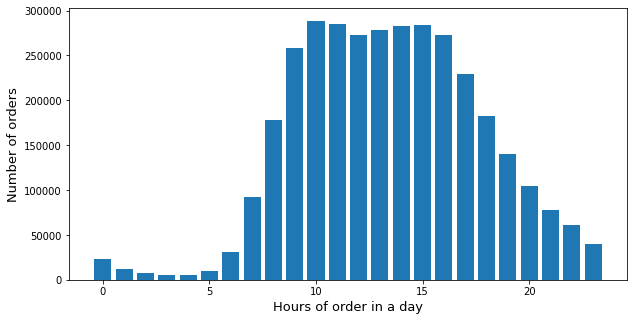

In [ ]:
grouped = orders.groupby("order_id")["order_hour_of_day"].aggregate("sum").reset_index()
grouped = grouped.order_hour_of_day.value_counts()

#sns.set_style('darkgrid')
fig = plt.figure(figsize = (10, 5))
plt.bar(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Hours of order in a day', fontsize=13)
plt.show()

Here, we can observe that customer, place very less ordes from 12 am to 5 am. Gradually, from 6am to 9am there is increase in the orders.  The peak hours of instacart orderis around 10am and almost same number of orders are placed till 4pm which has almost reached 300000 order in a day. Then eventually, the number of orders placed in instacart is decreased. 


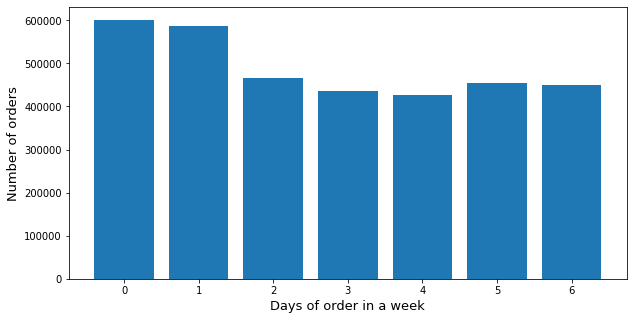

In [ ]:
grouped = orders.groupby("order_id")["order_dow"].aggregate("sum").reset_index()
grouped = grouped.order_dow.value_counts()
fig = plt.figure(figsize = (10, 5))
plt.bar(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Days of order in a week', fontsize=13)
plt.show()

With respect to the orders in a week, the most placed days of the week is saturday and sunday.Assuming 0 to be Saturday and 1 to be Sunday and rest of the numbers to be Monday-Friday respectively, it only make sense that most of the orders are recieved on weekends.

The frequency decreases in the middle days of the week but again increases as we approach the weekend. the least purchases can be observed on wednesday

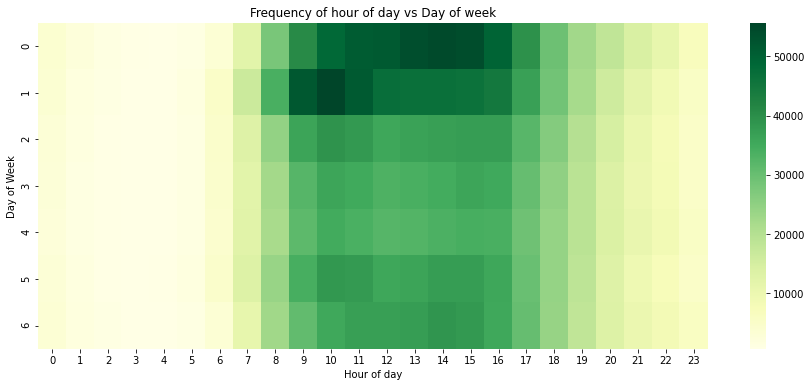

In [ ]:
# creating a df which contains these two columns
grouped_df = orders.groupby(['order_dow', 'order_hour_of_day'])['order_id'].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_id')
plt.figure(figsize=(15, 6))
sns.heatmap(grouped_df, cmap='YlGn')
plt.xlabel('Hour of day')
plt.ylabel('Day of Week')
plt.title('Frequency of hour of day vs Day of week');

This visulization is a combination of the above two visulization. It has information of day of week and hour of day and number of orders. The darkest colours implies that , the all the three parameters are more, highest being day 0,1. This is we can observe that during all days of the week,  from 8-19 hours have highest orders placed on the app. Similarly, All these of the week, from 0-7 hours and 20-23 hrs there is less number of orders places. 

In [ ]:
items  = pd.merge(left =pd.merge(left=products, right=department, how='left'), right=aisles, how='left')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


Products, department, aisle are all interlinked to the get information of all products, merging the tables as items. 

In [ ]:
grouped = pd.DataFrame(items.groupby("department")["product_id"].agg(Total_products= 'count')).reset_index()
grouped['Ratio'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped.sort_values(by='Total_products', ascending=False, inplace=True)
grouped

,department,Total_products,Ratio
17,personal care,6563,0.132084
20,snacks,6264,0.126067
16,pantry,5371,0.108095
3,beverages,4365,0.087848
10,frozen,4007,0.080643
7,dairy eggs,3449,0.069413
11,household,3085,0.062087
6,canned goods,2092,0.042103
9,dry goods pasta,1858,0.037393
19,produce,1684,0.033891


The above table gives us the information of total number of products in each department

The highest ratio of products is for personal care, and lest is for bulk department

In [ ]:
products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:

department.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
users_flow = orders[['user_id', 'order_id','order_dow','order_hour_of_day']].merge(train[['order_id', 'product_id','reordered','add_to_cart_order']],
                                          how='inner', left_on='order_id', right_on='order_id')

users_flow = users_flow.merge(items, how='inner', left_on='product_id',
                                         right_on='product_id')

### **Analysis**

The main focus of the analysis to find the time at which a purchase of the product in a day or in week is to combine products, departments, aisle and order. Since we already combined the first three tables, now we need to combine orders on a order_id column. 

In [ ]:
users_flow.head()

,user_id,order_id,order_dow,order_hour_of_day,product_id,reordered,add_to_cart_order,product_name,aisle_id,department_id,department,aisle
0,1,1187899,4,8,196,1,1,Soda,77,7,beverages,soft drinks
1,67,2757217,0,11,196,1,1,Soda,77,7,beverages,soft drinks
2,676,632715,0,13,196,1,2,Soda,77,7,beverages,soft drinks
3,760,1167274,4,10,196,1,2,Soda,77,7,beverages,soft drinks
4,804,3347074,3,21,196,0,4,Soda,77,7,beverages,soft drinks


### 1. On  which the day of the week, which aisle is most visited by the user

In [78]:

from scipy import stats
grouped = pd.DataFrame(users_flow.groupby("aisle")["order_dow"].agg(lambda x: stats.mode(x)[0]).to_frame('day_of_the_week')).reset_index()
grouped
grouped_zeros = grouped[grouped['day_of_the_week'] ==0].index
grouped.drop(grouped_zeros, inplace = True)
grouped

,aisle,day_of_the_week
9,beers coolers,5
29,cold flu allergy,1
47,first aid,6
77,kosher foods,1
84,mint gum,5
109,red wines,5
121,specialty wines champagnes,6
123,spirits,5
128,trail mix snack mix,1
132,white wines,5


1. Finding the most visited aisle is white wines is day 6 of the week,i.e on Friday. It means the on friday, customers order from energy drinks, champanes from the store. Lets see which aisles orders are purchased in a hour of the day

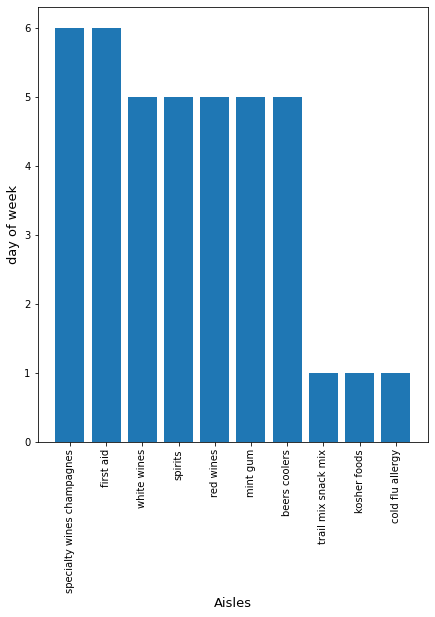

In [80]:
grouped  = grouped.groupby(['aisle']).sum()['day_of_the_week'].sort_values(ascending=False)
plt.figure(figsize=(7,8))
plt.xticks(rotation='vertical')
plt.bar(grouped.index, grouped.values)
plt.ylabel('day of week', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()

The above graph illustrates that the most visited ailes on day 6 i.e., Friday are speaciality wines, first aid. The next most visited aisles are on day 5 i.e., Thursday , which are white wines, spirit, red wines, mint gum, beers coolers. On day 1 i.e Sunday, trail snack mix, kosher foods, cold flu allergy. 

### 2. On which day of the week, the corresponding department the aisle belong to 

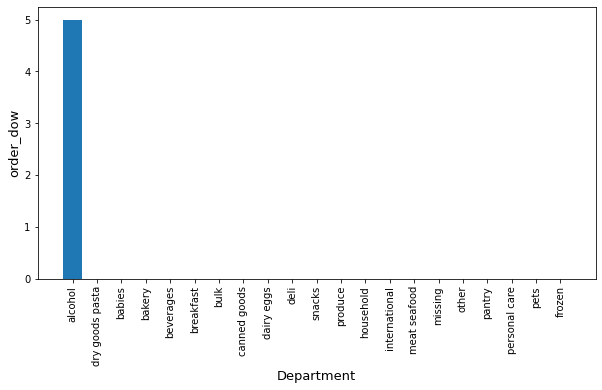

In [84]:
grouped = pd.DataFrame(users_flow.groupby("department")["order_dow"].agg(lambda x: stats.mode(x)[0]).to_frame('order_dow')).reset_index()
# grouped_zeros = grouped[grouped['order_dow'] ==0].index
# grouped.drop(grouped_zeros, inplace = True)
grouped  = grouped.groupby(['department']).sum()['order_dow'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar(grouped.index, grouped.values)
plt.ylabel('order_dow', fontsize=13)
plt.xlabel('Department', fontsize=13)
plt.show()

In a week, the most visited department by the customer is on day 5 and it is alchol department,So by thursday , friday this department gets busy. It is evident that, the corresponding department of the aisle we observed is in alchol section 

### 3. On which hour of the day, which aisle is most visited by the user

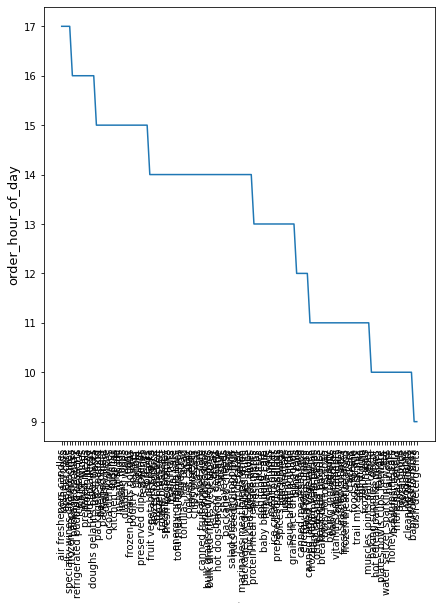

In [85]:
grouped = pd.DataFrame(users_flow.groupby("aisle")["order_hour_of_day"].agg(lambda x: stats.mode(x)[0]).to_frame('order_hour_of_day')).reset_index()
grouped  = grouped.groupby(['aisle']).sum()['order_hour_of_day'].sort_values(ascending=False)
plt.figure(figsize=(7,8))
plt.xticks(rotation='vertical')
plt.plot(grouped.index,grouped.values,)
plt.ylabel('order_hour_of_day', fontsize=13)
plt.xlabel('aisle', fontsize=1)
#plt.setp(aisles, rotation=30, horizontalalignment='right')
plt.show()


Here, we see that the most sales are obtained at 17 hours in the day ie. around 5pm in the evening from air freshner candles aisles. At morning 9am the most purchased aisle is detergent, cleaning products aisle. Now lets take a look at the department they belong to

### 4. On which hour of the day, the corresponding department the aisle belongs to. 

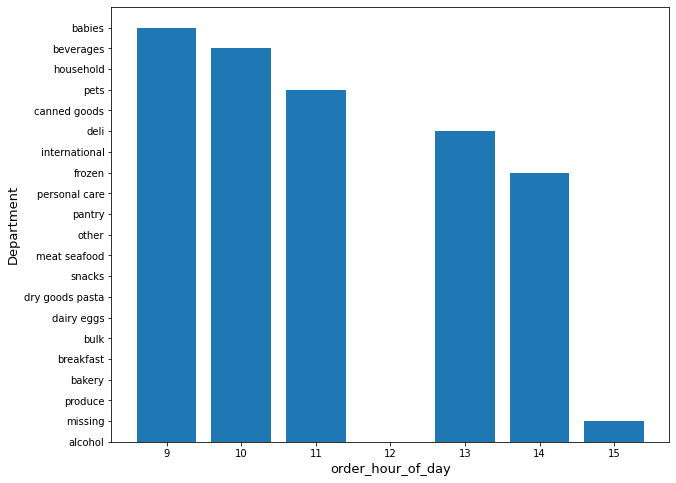

In [86]:
grouped = pd.DataFrame(users_flow.groupby("department")["order_hour_of_day"].agg(lambda x: stats.mode(x)[0]).to_frame('order_hour_of_day')).reset_index()
grouped  = grouped.groupby(['department']).sum()['order_hour_of_day'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
#plt.xticks(rotation='vertical')
plt.bar( grouped.values,grouped.index)
plt.ylabel('Department', fontsize=13)
plt.xlabel('order_hour_of_day', fontsize=13)
plt.show()

From the above visualization, the most visited aisles corresponding department the following: at 9am for babies, beverages , household products, at 3pm , there is alchol purchases are more

Overall, the above analysis suggests us that, the most visited department and ailses for day of the week is alcohol on weekends ie. friday. The  visited aisles and department for the hour of the day babies department and in the early hours of the day. 